In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
#define environment area & reward & action 
environment_rows = 3
environment_columns = 4

q_values = np.zeros((environment_rows, environment_columns, 4))

actions = ['up', 'right', 'down', 'left']

rewards = np.zeros((environment_rows, environment_columns))

#定義結算點
rewards[0, 3] = 100 
rewards[1, 1] = -100
rewards[1, 3] = -100


In [192]:
#確認是否為結算點
def check_terminal_state(current_row_index, current_column_index):
    if rewards[current_row_index, current_column_index] == 0:
        return False
    else:
        return True

#取得下一個動作
def get_next_action(current_row_index, current_column_index, epsilon):

    #根據 epsilon 決定是否做分數最高的動作
    if np.random.uniform(0, 1) < epsilon :
        return np.argmax(q_values[current_row_index, current_column_index])
    else:
        return np.random.randint(0, 4)
    
#取得下一個狀態
def get_next_state(current_row_index, current_column_index, actionsIndex):
    new_row_index = current_row_index
    new_column_index = current_column_index

    #判斷動作及是否超出邊界
    if actions[actionsIndex] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[actionsIndex] == 'right' and current_column_index < environment_columns-1:
        new_column_index += 1
    elif actions[actionsIndex] == 'down' and current_row_index < environment_rows-1:
        new_row_index += 1
    elif actions[actionsIndex] == 'left' and current_column_index > 0:
        new_column_index -= 1

    return new_row_index, new_column_index

#取得初始狀態
def get_start_state():
  start_row_index = np.random.randint(environment_rows)
  start_column_index = np.random.randint(environment_columns)
 
 #確保初始狀態不是結算點
  while check_terminal_state(start_row_index, start_column_index):
    start_row_index = np.random.randint(environment_rows)
    start_column_index = np.random.randint(environment_columns)

  return start_row_index, start_column_index

#取得根據 q_values 得出的最短路徑
def get_shortest_path(start_row_index, start_column_index):
    row_index = start_row_index
    column_index = start_column_index
    shortest_path = []
    shortest_path.append([row_index, column_index])

    while not check_terminal_state(row_index, column_index):
        action = get_next_action(row_index, column_index, 1)
        row_index, column_index = get_next_state(row_index, column_index, action)
        shortest_path.append([row_index, column_index])

    return shortest_path

#顯示 q_values
def show_q_values():
    actions_values = []
    for i in range(environment_rows):
        for j in range(environment_columns):
            actions_values.append(q_values[i][j])

    df = pd.DataFrame(actions_values)
    row_column_index = []
    
    for i in range(environment_rows):
        for j in range(environment_columns):
            row_column_index.append("state (" + str(i) + " , " + str(j) + ")")

    df.index = row_column_index
    df.columns = actions

    plt.figure('123')            # 視窗名稱
    ax = plt.axes(frame_on=False)# 不要額外框線
    ax.xaxis.set_visible(False)  # 隱藏X軸刻度線
    ax.yaxis.set_visible(False)  # 隱藏Y軸刻度線
    pd.plotting.table(ax, df, loc='center') #將mytable投射到ax上，且放置於ax的中間
    plt.show()

#顯示 rewards
def show_rewards():
    for values in rewards:
        print(values)

#顯示路徑
def show_path(path):
    path_table = rewards
    for i in range(len(path)):
        path_table[path[i][0]][path[i][1]] = 50
        if i == len(path)-1:
            path_table[path[i][0]][path[i][1]] = 100
    sns.heatmap(path_table,vmax=100,vmin= -100,cmap = "RdBu_r",linewidths= 0.3)



In [193]:
#定義訓練參數
epsilon = 0.9 
discount_rate = 0.9 
learning_rate = 0.9 

#訓練 q_value
for episode in range(1000):
  
  row_index, column_index = get_start_state()

  while not check_terminal_state(row_index, column_index):
    
    action_index = get_next_action(row_index, column_index, epsilon)

    old_row_index, old_column_index = row_index, column_index
    row_index, column_index = get_next_state(row_index, column_index, action_index)
    
    reward = rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]


    temporal_difference = reward + (discount_rate * np.max(q_values[row_index, column_index])) - old_q_value

    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')


Training complete!


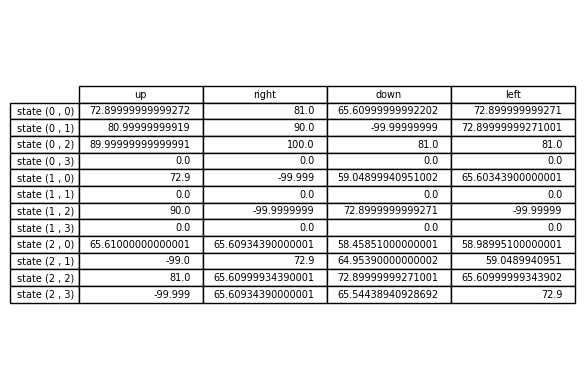

shortest_path：
start = 2 2


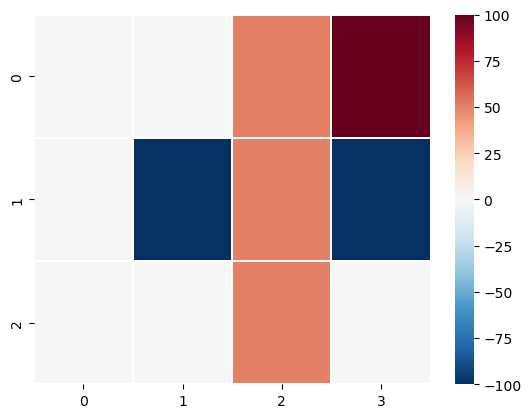

In [194]:
show_q_values()
row, column = get_start_state()
print("shortest_path：")
print("start =", row, column)
path = get_shortest_path(row, column)
show_path(path)